# <en><center>Exploratory Data Analysis</center></en>

## Table of Contents
- [Libraries](#Libraries)
- [Loading Data in Python](#Loading-Data-in-Python)
- [Dataset Preparation](#Dataset-Preparation)

## Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
import pickle

## Loading Data in Python

#### Datasets

In [3]:
filename = "C:\\Users\\pyria\\OneDrive\Documents\\\
Personal Development\Python\\\
Bootcamps\\Python for Statistical Analysis\\\
LoadingDatasets\\load.csv"

In [5]:
data = pd.read_csv(filename)

In [6]:
data.head()

,A,B,C,D,E
0,1.276,21.400,63.957,216.204,528
1,1.002,21.950,61.697,204.484,514
2,1.114,22.454,63.522,205.608,514
3,1.133,22.494,61.590,206.565,501
4,0.845,21.654,63.729,201.289,532


In [10]:
cols = None 
data2 = []
with open(filename) as f:
    for line in f.readlines():
        vals = line.replace("\n", "").split(",")
        if cols is None:
            cols = vals
        else:
            data2.append([float(x) for x in vals])
            
d0 = pd.DataFrame(data2, columns = cols)
print(d0.dtypes)

d0.head()
            

A    float64
B    float64
C    float64
D    float64
E    float64
dtype: object


,A,B,C,D,E
0,1.276,21.400,63.957,216.204,528.0
1,1.002,21.950,61.697,204.484,514.0
2,1.114,22.454,63.522,205.608,514.0
3,1.133,22.494,61.590,206.565,501.0
4,0.845,21.654,63.729,201.289,532.0


#### Loading Data with Numpy

In [11]:
d1 = np.loadtxt(filename, skiprows = 1,delimiter = ",")
print(d1.dtype)
print(d1[:5,:])

float64
[[  1.276  21.4    63.957 216.204 528.   ]
 [  1.002  21.95   61.697 204.484 514.   ]
 [  1.114  22.454  63.522 205.608 514.   ]
 [  1.133  22.494  61.59  206.565 501.   ]
 [  0.845  21.654  63.729 201.289 532.   ]]


In [12]:
d2 = np.genfromtxt(filename, delimiter = ",",names = True, dtype = None)
print(d2.dtype)
print(d2[:5])

[('A', '<f8'), ('B', '<f8'), ('C', '<f8'), ('D', '<f8'), ('E', '<i4')]
[(1.276, 21.4  , 63.957, 216.204, 528)
 (1.002, 21.95 , 61.697, 204.484, 514)
 (1.114, 22.454, 63.522, 205.608, 514)
 (1.133, 22.494, 61.59 , 206.565, 501)
 (0.845, 21.654, 63.729, 201.289, 532)]


#### Loading Data with Pickle

In [15]:
with open("C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\Python\\\
Bootcamps\\Python for Statistical Analysis\\LoadingDatasets\\load_pickle.pickle","rb") as f:
    d4 = pickle.load(f)
print(d4.dtypes)
d4.head()

A    float64
B    float64
C    float64
D    float64
E      int32
dtype: object


,A,B,C,D,E
0,1.276405,21.400157,63.957476,216.204466,528
1,1.002272,21.950088,61.697286,204.483906,514
2,1.114404,22.454274,63.522075,205.608375,514
3,1.133367,22.494079,61.589683,206.565339,501
4,0.844701,21.653619,63.728872,201.289175,532


## Dataset Preparation

### Dataset

In [18]:
data_set = "C:\\Users\\pyria\\OneDrive\\Documents\\\
Personal Development\\Python\\Bootcamps\\\
Python for Statistical Analysis\\\
PreparingDatasets\\Diabetes.csv"

In [19]:
df = pd.read_csv(data_set)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
df.dropna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [24]:
df2 = df[["Glucose","BMI","Age", "Outcome"]]

In [25]:
df2.head()

,Glucose,BMI,Age,Outcome
0,148,33.6,50,1
1,85,26.6,31,0
2,183,23.3,32,1
3,89,28.1,21,0
4,137,43.1,33,1


In [27]:
df2.describe()

,Glucose,BMI,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000
mean,120.894531,31.992578,33.240885,0.348958
std,31.972618,7.884160,11.760232,0.476951
min,0.000000,0.000000,21.000000,0.000000
25%,99.000000,27.300000,24.000000,0.000000
50%,117.000000,32.000000,29.000000,0.000000
75%,140.250000,36.600000,41.000000,1.000000
max,199.000000,67.100000,81.000000,1.000000


- We need to remove the 0s in the Glucose and BMI columns.
- The 0s represent null values that were replaced with 0.

In [32]:
df2.columns

Index(['Glucose', 'BMI', 'Age', 'Outcome'], dtype='object')

- We choose all the rows up until the last one
- The ~ turns values that are true into false and false values into true

In [37]:
(df2[df2.columns[:-1]] == 0)

,Glucose,BMI,Age
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
763,False,False,False
764,False,False,False
765,False,False,False
766,False,False,False


This is how to remove rows with 0 as an entry.

In [36]:
df3 = df2.loc[~(df2[df2.columns[:-1]] == 0).any(axis = 1)]
df3.describe()

,Glucose,BMI,Age,Outcome
count,752.000000,752.000000,752.000000,752.000000
mean,121.941489,32.454654,33.312500,0.351064
std,30.601198,6.928926,11.709395,0.477621
min,44.000000,18.200000,21.000000,0.000000
25%,99.750000,27.500000,24.000000,0.000000
50%,117.000000,32.300000,29.000000,0.000000
75%,141.000000,36.600000,41.000000,1.000000
max,199.000000,67.100000,81.000000,1.000000


If we use the mean on each column:
- we find that those with diabetes have a higher age, BMI and blood glucose levels.

In [38]:
df3.groupby("Outcome").mean()

,Glucose,BMI,Age
Outcome,,,
0,110.825820,30.876434,31.309426
1,142.488636,35.371970,37.015152


Use the generic aggregator function:
- Parse in a dictionary that links the column name to the aggregate method that I want to use.
- This allows you to use aggregate functions on each column.

In [42]:
df3.groupby("Outcome").agg({"Glucose": "mean", "BMI": "median", "Age": "sum"})

,Glucose,BMI,Age
Outcome,,,
0,110.825820,30.10,15279
1,142.488636,34.25,9772


In [39]:
df3.groupby("Outcome").agg(["mean","median"])

Glucose               BMI               Age       
               mean median       mean median       mean median
Outcome                                                       
0        110.825820  107.5  30.876434  30.10  31.309426   27.0
1        142.488636  140.5  35.371970  34.25  37.015152   36.0

This is how to seperate the groups.

In [43]:
positive = df3.loc[df3["Outcome"] == 1]
negative = df3.loc[df3["Outcome"] == 0]
print(positive.shape, negative.shape)

(264, 4) (488, 4)


## Outliers

### Datasets

(1010,) (1010, 2)


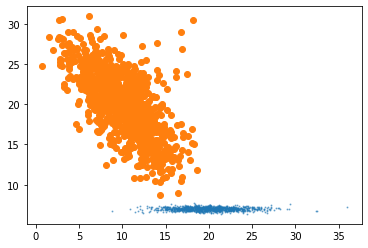

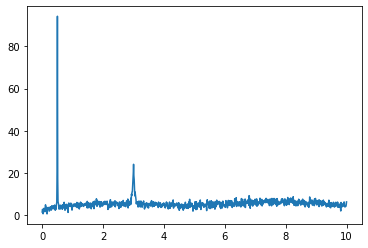

In [48]:
outlier_1d = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\\
Python\\Bootcamps\\Python for Statistical Analysis\\Outliers\\outlier_1d.txt"
outlier_2d = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\\
Python\\Bootcamps\\Python for Statistical Analysis\\Outliers\\outlier_2d.txt"
outlier_curve = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\\
Python\\Bootcamps\\Python for Statistical Analysis\\Outliers\\outlier_curve.txt"

d1 = np.loadtxt(outlier_1d)
d2 = np.loadtxt(outlier_2d)
d3 = np.loadtxt(outlier_curve)
print(d1.shape, d2.shape)

plt.scatter(d1, np.random.normal(7,0.2, size = d1.size),s = 1, alpha = 0.5)
plt.scatter(d2[:,0],d2[:,1])
plt.show()
plt.plot(d3[:,0],d3[:,1])

Rejection 5 points
z-score of 3 corresponds to a prob of 0.27%


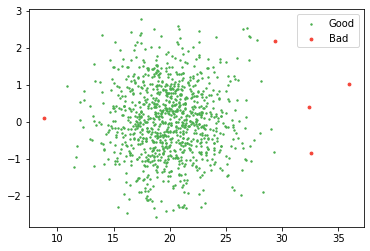

In [52]:
mean, std = np.mean(d1), np.std(d1)
z_score = np.abs((d1 - mean)/ std)
threshold = 3
good = z_score < threshold

print(f"Rejection {(~good).sum()} points")
from scipy.stats import norm
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
visual_scatter = np.random.normal(size=d1.size)
plt.scatter(d1[good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(d1[~good], visual_scatter[~good], s=8, label="Bad", color="#F44336")
plt.legend();

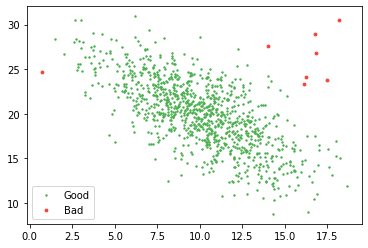

In [53]:
from scipy.stats import multivariate_normal as mn

mean, cov = np.mean(d2, axis=0), np.cov(d2.T)
good = mn(mean, cov).pdf(d2) > 0.01 / 100

plt.scatter(d2[good, 0], d2[good, 1], s=2, label="Good", color="#4CAF50")
plt.scatter(d2[~good, 0], d2[~good, 1], s=8, label="Bad", color="#F44336")
plt.legend();

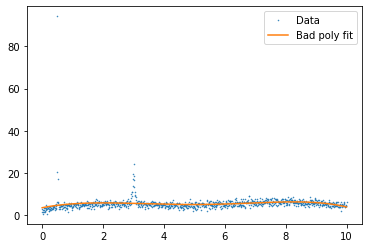

In [54]:
xs, ys = d3.T
p = np.polyfit(xs, ys,deg=5)
ps = np.polyval(p, xs)
plt.plot(xs, ys, ".", label="Data", ms=1)
plt.plot(xs, ps, label="Bad poly fit")
plt.legend();

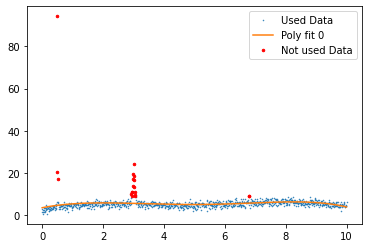

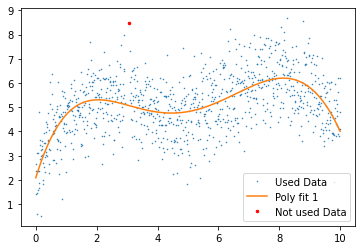

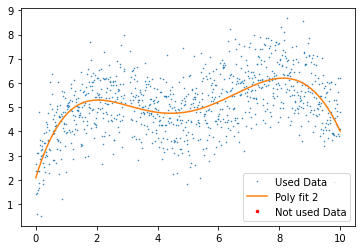

In [55]:
x, y = xs.copy(), ys.copy()
for i in range(5):
    p = np.polyfit(x, y, deg=5)
    ps = np.polyval(p, x)
    good = y - ps < 3  # only remove positive outliers
    
    x_bad, y_bad = x[~good], y[~good]
    x, y = x[good], y[good]
    
    plt.plot(x, y, ".", label="Used Data", ms=1)
    plt.plot(x, np.polyval(p, x), label=f"Poly fit {i}")
    plt.plot(x_bad, y_bad, ".", label="Not used Data", ms=5, c="r")
    plt.legend()
    plt.show()
    
    if (~good).sum() == 0:
        break

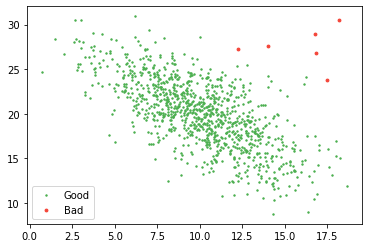

In [56]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.005)
good = lof.fit_predict(d2) == 1
plt.scatter(d2[good, 0], d2[good, 1], s=2, label="Good", color="#4CAF50")
plt.scatter(d2[~good, 0], d2[~good, 1], s=8, label="Bad", color="#F44336")
plt.legend();